In [1]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0000720002"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0000720002
SIC,6022
Description,STATE COMMERCIAL BANKS
Name,MAINSOURCE FINANCIAL GROUP
Ticker,MSFG


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,20.0,1.348250e+01,1.545897e+00,11.84,1.249250e+01,13.46,1.389500e+01,18.9
interest income,48.0,3.112661e+07,6.423850e+06,3246368.00,2.716875e+07,31710500.00,3.531900e+07,42341000.0
net income,48.0,3.871926e+06,8.400260e+06,-38069000.00,3.470250e+06,6007000.00,7.342500e+06,11696000.0
net interest income,48.0,2.410511e+07,5.726558e+06,1546263.00,2.258575e+07,24247500.00,2.537050e+07,37671000.0
provision for loan losses,48.0,2.840300e+06,3.678972e+06,0.00,5.195000e+05,949500.00,3.603250e+06,13515000.0


# Plots

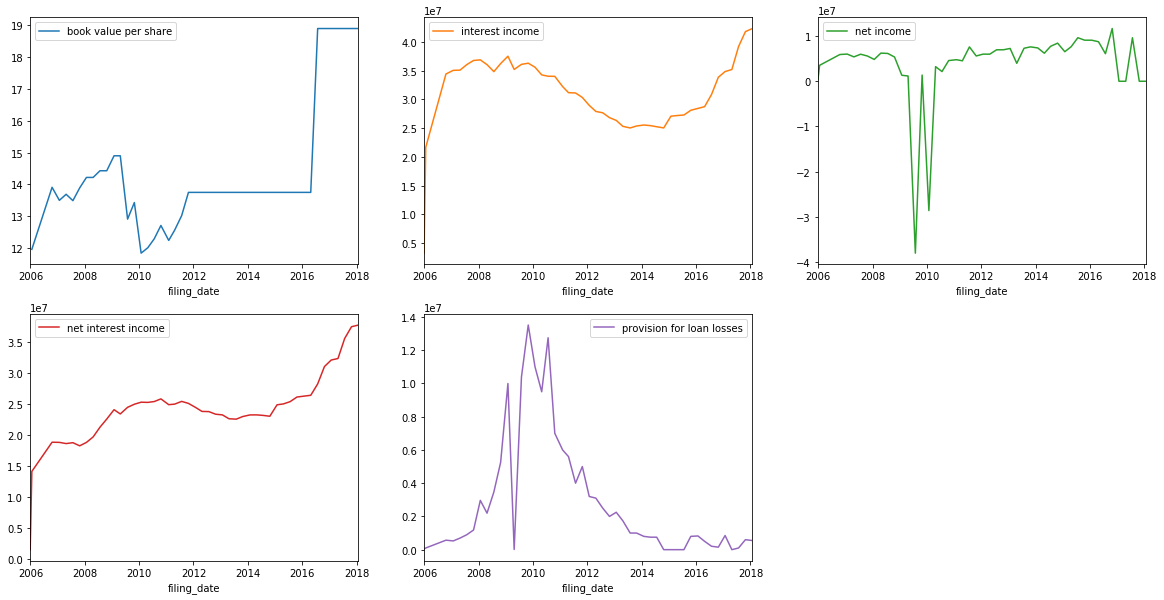

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period msg_type  \
cik        item                                                               
0000720002 book value per share                             2005Q3  missing   
           book value per share        2006Q1 to 2006Q2: 2 periods  missing   
           book value per share                             2008Q1  missing   
           book value per share                             2008Q3  missing   
           book value per share                             2009Q1  missing   
           book value per share       2011Q4 to 2016Q1: 18 periods  missing   
           book value per share        2016Q3 to 2017Q4: 6 periods  missing   
           interest income             2006Q1 to 2006Q2: 2 periods  missing   
           net income                  2006Q1 to 2006Q2: 2 periods  missing   
           net interest income         2006Q1 to 2006Q2: 2 periods  missing   
           provision for loan losses   2006Q1 to 2006Q2: 2 periods  missing   
           total revenue                                      None    empty   

                                                 message  
cik        item                                           
0000720002 book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           interest income                Missing period  
           net income                     Missing period  
           net interest income            Missing period  
           provision for loan losses      Missing period  
           total revenue              No values for item

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()